In [1]:
from py_factorio_blueprints.util import *
from PIL import Image, ImagePalette
from collections import defaultdict


In [2]:
def get_avg_color(img):
    sr, sg, sb, sa = 0, 0, 0, 0
    # print([x for x in img.getdata()])
    for r, g, b, a, in img.getdata():
        sr += r * a;
        sg += g * a
        sb += b * a
        sa += a
    return sr // sa, sg // sa, sb // sa

def color_dist(c1, c2):
    return (c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2 + (c1[2] - c2[2]) ** 2


In [27]:
PATH = '/mnt/c/Program Files (x86)/Steam/steamapps/common/Factorio/data/base/graphics/icons'

MATERIALS = [
    'iron-plate',
    'copper-plate',
    'plastic-bar',
    'assembling-machine-1',
    'assembling-machine-2',
    'cliff-explosives',
    'coal',
    'concrete',
    'effectivity-module',
    'electronic-circuit',
    'explosives',
    'hazard-concrete',
    'iron-chest',
    'iron-ore',
    'landfill',
    'processing-unit',
    'productivity-module',
    'small-lamp',
    'solid-fuel',
    'speed-module',
    'stone',
    'steel-plate',
    'steel-chest',
    'stone-brick',
    'wooden-chest'
]
COLORS = {}

for name in MATERIALS:
    img = Image.open(f"{PATH}/{name}.png").crop((0, 0, 64, 64)).convert("RGBA")
    COLORS[get_avg_color(img)] = name

COLORS


{(134, 134, 134): 'iron-plate',
 (179, 110, 87): 'copper-plate',
 (197, 197, 197): 'plastic-bar',
 (97, 81, 71): 'assembling-machine-1',
 (75, 74, 86): 'assembling-machine-2',
 (64, 107, 132): 'cliff-explosives',
 (44, 40, 36): 'coal',
 (118, 121, 122): 'concrete',
 (87, 121, 68): 'effectivity-module',
 (95, 136, 39): 'electronic-circuit',
 (132, 73, 64): 'explosives',
 (111, 109, 89): 'hazard-concrete',
 (108, 92, 77): 'iron-chest',
 (80, 102, 113): 'iron-ore',
 (133, 124, 57): 'landfill',
 (85, 104, 164): 'processing-unit',
 (136, 89, 61): 'productivity-module',
 (158, 154, 152): 'small-lamp',
 (74, 74, 74): 'solid-fuel',
 (72, 112, 127): 'speed-module',
 (121, 102, 68): 'stone',
 (117, 118, 114): 'steel-plate',
 (119, 103, 101): 'steel-chest',
 (111, 112, 107): 'stone-brick',
 (130, 98, 46): 'wooden-chest'}

In [28]:
def convert(image: Image, palette: list, W_ROUND=4, H=32):
    width, height = image.size
    width, height = (H * width) // (height * W_ROUND) * W_ROUND, H
    image = image.resize((width, height))

    data = [[None] * H for _ in range(width)]

    for x in range(width):
        for y in range(height):
            c_orig = image.getpixel((x, y))
            _, rgb = min((color_dist(c_orig, color), color) for color in palette)

            image.putpixel((x, y), rgb)
            data[x][y] = rgb

    return image, data


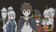

In [29]:
cat = Image.open('KonoSuba_characters.jpg')
cat, mp = convert(cat, COLORS.keys())
cat


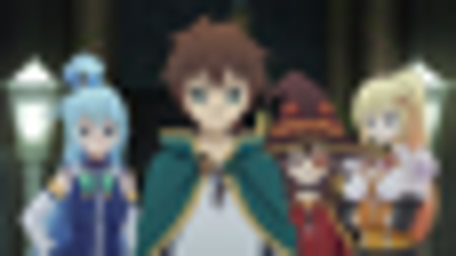

In [30]:
cat = Image.open('KonoSuba_characters.jpg')
cat.thumbnail((10**9, 32))

cat.resize((cat.width * 8, cat.height * 8))


In [31]:
from futil import *
import futil
import importlib
importlib.reload(futil)


bl = Blueprint()

bl.create_constant(0, 0)
bl.create_decider(1, 0, 15)

bl.add_connection(0, 0, Blueprint.CONN_CONSTANT, 1, 0, Blueprint.CONN_DECIDER_IN, 'green')
bl.add_connection(1, 0, Blueprint.CONN_DECIDER_OUT, 1, 0, Blueprint.CONN_DECIDER_IN, 'green')

bl.pr()


0eJydkdFqwzAMRX+l+LkdS1hfBnvdT4xhnERNBYkcZDk0FP/7VCdbs3UwuocY6Vq6Ock9m6qLMDCSmOfN2QAJCkLQ5m3pJkuxr4BVKrYbQ64HLU3tKYgj2dW+r5CceDZ6PfigBp6y20nPx4e9ytNcJS0bZKiXkXKbjWgWQl4q8tkyAH2jwOZzAbmOKLNQpPeU1PYWtlzBNlBjA/wXa/HFWvwkfZpJhX1nKzi6ET3nvcXa6mWD1684IAexAVtyXRZkGjLKiCxRtRXdPLV7NWl7/a8XiH3u+8FxRtbRl8uejzLEO81hBJ7kiNQubxkmRY4k9sC+t0jqqOPCEVK6N5XiNpVVIr8HV2pwqpX/SFufD0ir4o8=


In [32]:
def generate_blueprint(data: list[list], palette: dict):
    W = len(data)
    assert W % 4 == 0 and all(len(col) == 32 for col in data)

    bl = Blueprint()

    for x, column in enumerate(data):
        X = x // 4
        C = [0 + 4 * (x % 4), 1 + 4 * (x % 4)]
        D = 2 + 4 * (x % 4)

        bl.create_constant(X, C[0])
        bl.create_constant(X, C[1])
        bl.create_decider (X, D, f_value=X + 1)

        bl.add_connection(X, D, Blueprint.CONN_DECIDER_IN, X-1, D, Blueprint.CONN_DECIDER_IN, 'green', strict=False)
        bl.add_connection(X, D, Blueprint.CONN_DECIDER_IN, X, D-4, Blueprint.CONN_DECIDER_IN, 'green', strict=False)
        bl.add_connection(X, D, Blueprint.CONN_DECIDER_OUT, X-1, D, Blueprint.CONN_DECIDER_OUT, 'red', strict=False)

        bl.add_connection(X, C[0], Blueprint.CONN_CONSTANT, X, C[1], Blueprint.CONN_CONSTANT, 'red')
        bl.add_connection(X, C[1], Blueprint.CONN_CONSTANT, X, D, Blueprint.CONN_DECIDER_IN, 'red')

        for y, rgb in enumerate(column):
            item = palette[rgb]
            bl.add_item(X, C[y % 2], item, (1 << y) * (1 if y < 31 else -1))

    return bl


In [8]:
Blueprint(string='0eNqtkdsKwjAQRP9lnqPQi7bmV0Skl0UW7KYkqVhK/t2kfREEQfAlZMLsmWGzoL1PNFoWD72AOyMO+rzA8U2ae3rz80jQYE8DFKQZkko+34jfdWZoWRpvLIICS09P6CxcFEg8e6YNt4r5KtPQko2GryCF0bg4ayTlJ97xsD8ozNBlvMScni11myFXiSGbdGkgS4el/j2Yo8rDJYSgPsrkv5Yp/1AmW8vENa171W/foPAg6zZcnZXVKa+quqiL4hjCC8Brj/o=')._root


{'blueprint': {'icons': [{'signal': {'type': 'item',
     'name': 'constant-combinator'},
    'index': 1}],
  'entities': [{'entity_number': 1,
    'name': 'constant-combinator',
    'position': {'x': 165.5, 'y': 45.5},
    'direction': 2,
    'connections': {'1': {'red': [{'entity_id': 2}]}}},
   {'entity_number': 2,
    'name': 'constant-combinator',
    'position': {'x': 164.5, 'y': 45.5},
    'direction': 2,
    'connections': {'1': {'red': [{'entity_id': 1}]}}}],
  'item': 'blueprint',
  'version': 281479277838336}}

In [33]:
generate_blueprint(mp, COLORS).pr()


0eJzt3dtuY7eSBuBXCfqaHngdJW1gbuclBoOG25YTYcuSIcs9nb2Rdx+13MHQYhUPVbWo4hIvEiSOsprWgVyfWH/x31++bd/Xr4fN7vjlH7/9+8t6d9wcN+u307/8969/+/Pr7v3l2/pw+lFjfvuye3hZn/7xy+N+93Z82B3vHvcv3za7h+P+8OX0n1/3b6cL7Hfnq/04/f3+P4bTj//8+Ke/Tv/4tDmsH389pDXnC+0+fvB2/p+a898P66dPY9g8/f3wzeHxfXP8+EHz1//89dfHNY6H/fbrt/UfD983+8P5Es+b7XF9+PWrvG1+3z1szz8//vl6/g02x/XLl0+/0ekBH1d7Pz8dP3/dze5p/eP8J5nfaFfprau05Ks0o3WZjnyZ0R5NT75MO9jDGWKv8/D2tn75tt3sfr97eXj8Y7Nb37Wff8v71h7gSH/S71f2CBeM571b2kNa0p/6YejsMa1ir/S2326e7p7f1xevwdg2vT205p55xea+Xw4Le4wN423frPru/tP4OO/+xWLRfvoMNIwPwaK5Xy4/fRQaxmdhXPbd0H/6RDTRHwn3V71fdIu+WX76IDTjx0TnTskta0pu2FNy407J1jDPP+nyztqtyKy9FJm1O3sw9Dds09rDob9Vh8YeD/092p4mCpFpetms7BHRp+muXYz2kOjTdNOdPoH2oLjz9ND27dIeW/w8DTzxq0UzfHqHM97i3WkSvP80MsY7vRuGvv/0fo+fobH1qOvb5jTvfxoi493fjcvF/erTZ4AxUd+dlt9Fv+zGT58FfKburIs9rR83T+tD/ETdXU7TPTZ//rr019N/fNr8/xT+vDm8Hb8Cv+f3zeH4fvqZ/XKcH3X3X79+3Y9F5e+5fv/y+nA4j/j0yP/8+b/t34+v74nXXn9fH/48nu4Af//1h7z++fX8xH59Puxfvm52pyueHn48vK//Xio4SDj96PfDer1zHz2G169mgBaw089az7Lo/D/tz/cF+Mb

In [34]:
st = set()
for a in mp:
    for b in a:
        st.add(COLORS[b])
st


{'assembling-machine-1',
 'assembling-machine-2',
 'cliff-explosives',
 'coal',
 'concrete',
 'copper-plate',
 'effectivity-module',
 'explosives',
 'hazard-concrete',
 'iron-chest',
 'iron-ore',
 'iron-plate',
 'landfill',
 'plastic-bar',
 'processing-unit',
 'productivity-module',
 'small-lamp',
 'solid-fuel',
 'speed-module',
 'steel-chest',
 'steel-plate',
 'stone',
 'stone-brick',
 'wooden-chest'}